# INTRODUCTION:

In this notebook we will code the results from **Introduction to Machine Learning: Module III**, chapter 3.

The following algorithms will be covered:

- Regression:
    - Linear regression
    - Logistic regression
    - Polynomial regression
    - Decision trees for regression
    - Random forests for regression
    - Support vector regression (SVR)
- Classification:
    - Decision trees for classification
    - Random forests for classification
    - Support vector classifiers
    - K-nearest neighbors (KNN)

Each cell contains the necessary imported libraries, they can essentially be thought of as their own files. Feel free to copy any of the cells into a .py script to modify and run them.

To keep the notebook self-contained, we will generate synthetic data for each example. You are encouraged to edit how the data is generated and see how that effects the resulting predictions.

**Libraries used:**

To run this notebook, make sure that your Python environment (whether it is from conda or venv) contains:

- NumPy
- Scikit-learn
- Pandas
- matplotlib
- seaborn

**Learning strategy**:

Create your own notebook to follow along, and redo the analysis done here. Mess around with changing parameters in the data generation, and ML models, and see how the results change. Find some datasets that interest you, for example from kaggle.com, and conduct the analysis on them.

### 3.1.1 LINEAR REGRESSION

Linear regression is a technique that models the relationship between a dependent variable and one or more independent variables by fitting a straight line (or flat plane in higher dimensions) through the data points.  This line, known as the regression line, minimizes the sum of squared differences between the actual data points and the predictions.  Linear regression is best suited for situations where there is a linear relationship between variables, such as predicting house prices based on square footage or estimating sales from advertising spend.  It is often used as a baseline model due to its simplicity and interpretability, making it easy to understand how changes in input features affect the target variable.

**Example usage:**

Predicting house prices based on features like square footage, number of bedrooms, and how long ago the house was built.


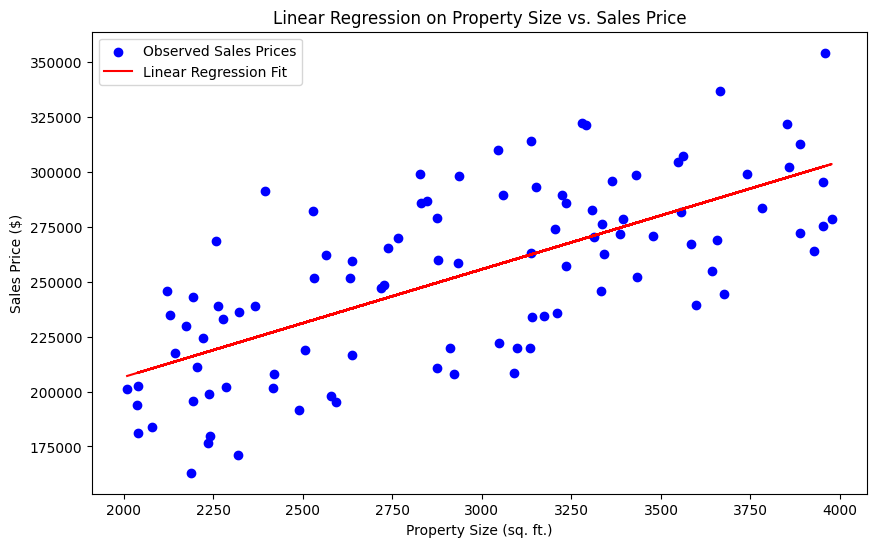

In [3]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset
np.random.seed(0)
sizes = 2000 + (np.random.rand(100) * 2000)  # 100 data points with sizes between 2000 and 4000 sq. ft.
sales_prices = 100000 + 50 * sizes + np.random.normal(0, 30000, sizes.shape[0])  # Linear relationship with noise

# Reshape sizes to fit the LinearRegression model requirements
sizes = sizes.reshape(-1, 1)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(sizes, sales_prices)

# Make predictions
sales_prices_pred = model.predict(sizes)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(sizes, sales_prices, color="blue", label="Observed Sales Prices")
plt.plot(sizes, sales_prices_pred, color="red", label="Linear Regression Fit")
plt.xlabel("Property Size (sq. ft.)")
plt.ylabel("Sales Price ($)")
plt.title("Linear Regression on Property Size vs. Sales Price")
plt.legend()
plt.show()


### 3.1.2: LOGISTIC REGRESSION

Logistic regression is a type of regression used when the target variable is binary or categorical, such as predicting whether a customer will buy or not buy a product.  Instead of fitting a straight line, logistic regression fits an S-shaped curve (the logistic function) that predicts the probability of a certain class or event occurring.  The output is bounded between 0 and 1, making it suitable for predicting a probability for situations such as spam detection or disease diagnosis.  These probabilities can be extended to classification based on if the result is greater than or less than 0.5.

**Example usage:**

Predicting whether a customer will buy a product based on features like age, income, and past purchase history.


Model Accuracy: 96.67%


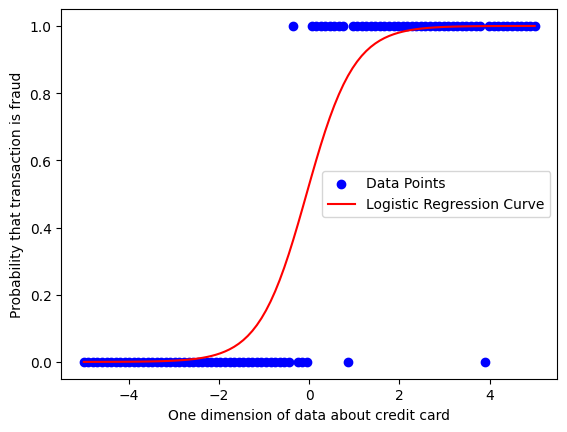

In [4]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(0)  # For reproducibility
n_samples = 100
X = np.linspace(-5, 5, n_samples).reshape(-1, 1)  # Single feature (needs to be reshaped to send to sklearn)
y = (X[:, 0] > 0).astype(int)  # Labels are 1 if X > 0, else 0

# Add some noise to make the classification less perfect
y[np.random.randint(0, n_samples, 10)] = 1 - y[np.random.randint(0, n_samples, 10)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plot the data and the logistic regression curve
plt.scatter(X, y, color='blue', label="Data Points")
x_values = np.linspace(-5, 5, n_samples)
y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]  # Probability of class 1
plt.plot(x_values, y_values, color='red', label="Logistic Regression Curve")
plt.xlabel('One dimension of data about credit card')
plt.ylabel('Probability that transaction is fraud')
plt.legend()
plt.show()

### 3.1.3 POLYNOMIAL REGRESSION

Polynomial regression extends linear regression by fitting a polynomial equation to the data, which allows for modeling non-linear relationships between the dependent and independent variables.  Instead of a straight line, it fits a curve that can bend to capture more complex patterns in the data.  It’s particularly useful when the relationship between variables is not linear, but a curved line fits better, such as predicting growth rates or modeling trends like temperature changes over time.  The model includes higher-degree terms of the input variables (like $x^2$, $x^3$), making it more flexible but also more prone to overfitting if not properly tuned.

**Example usage:**

Modeling the growth rate of a bacteria population over time when the growth is non-linear.

Mean Squared Error: 21.33


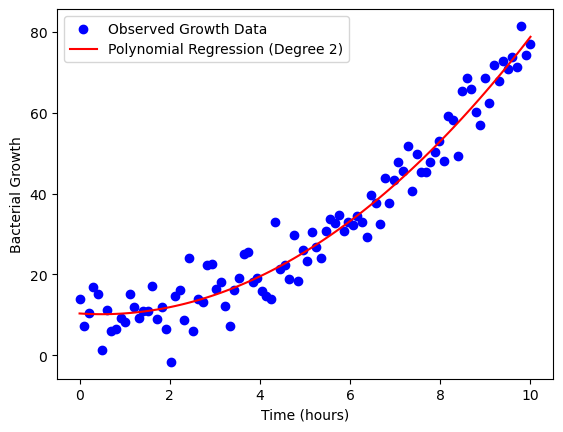

In [ ]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data for bacterial growth
np.random.seed(0)  # For reproducibility
time = np.linspace(0, 10, 100)  # Time in hours
growth = 0.5 * time**2 + 2 * time + 5 + np.random.normal(0, 5, size=time.shape)  # Polynomial relationship with noise

# Reshape time to use it as a feature matrix
time = time.reshape(-1, 1)
growth = growth.reshape(-1, 1)

# Apply polynomial features transformation
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
time_poly = poly_features.fit_transform(time)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(time_poly, growth)

# Make predictions
growth_pred = model.predict(time_poly)
mse = mean_squared_error(growth, growth_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the data and the polynomial regression curve
plt.scatter(time, growth, color='blue', label="Observed Growth Data")
plt.plot(time, growth_pred, color='red', label=f"Polynomial Regression (Degree {degree})")
plt.xlabel("Time (hours)")
plt.ylabel("Bacterial Growth")
plt.legend()
plt.show()

### 3.1.4 DECISION TREES for regression

Decision trees are non-linear regression models that work by splitting the data into subsets based on the values of the input features.  Each node in the tree represents a decision rule based on a feature, and each leaf node represents a predicted outcome.  The tree structure allows for easy interpretation and visualization of the decision-making process.  Decision trees are useful for capturing complex, non-linear relationships and interactions between features, making them suitable for both regression and classification tasks.  However, they are prone to overfitting, especially if the tree becomes too deep.

**Example usage:**

Decision trees for regression could be used for predicting the sales revenue for a retail store based on seasonal trends, holidays, and promotional campaigns.


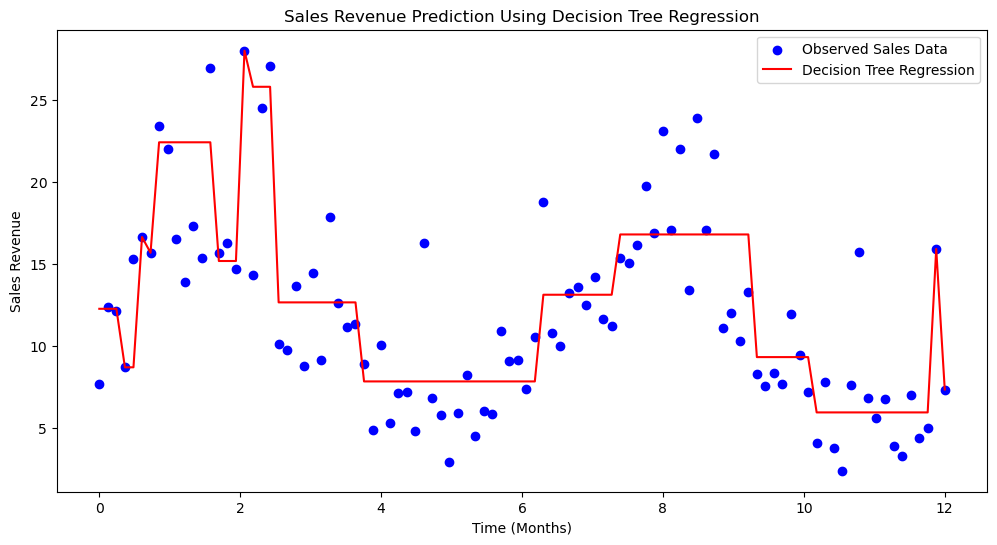

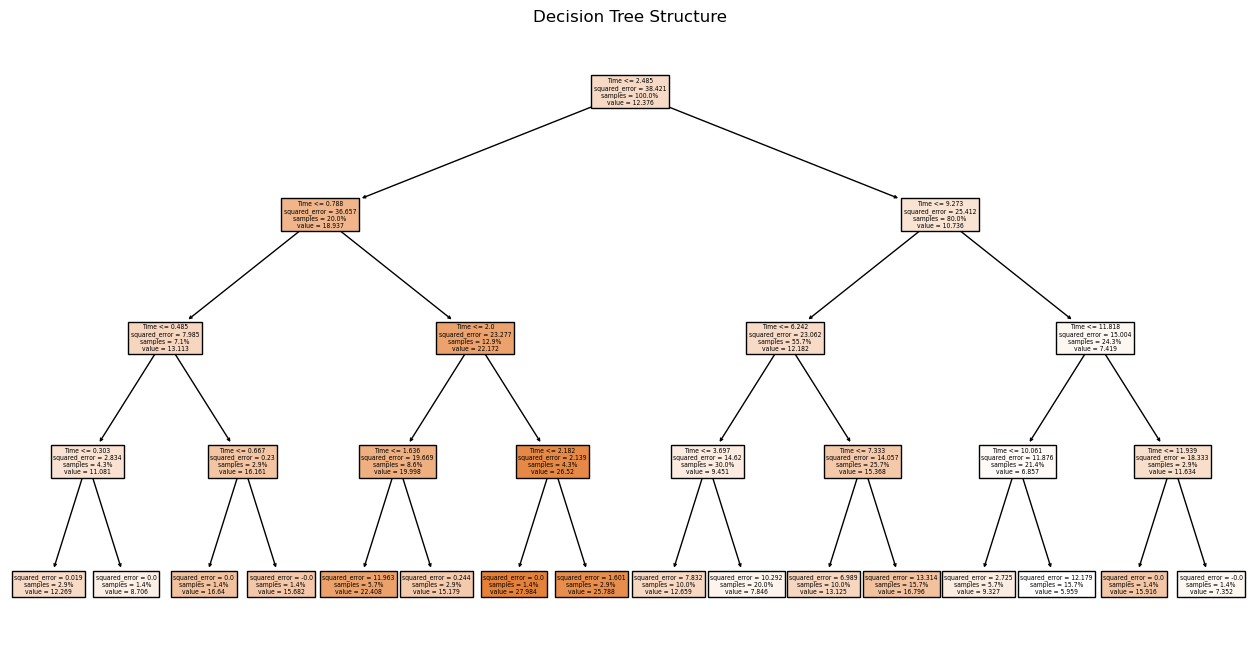

In [ ]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# Generate synthetic data for retail sales
np.random.seed(0)  # For reproducibility
n_samples = 100
# Generate seasonal effect (sine wave) + holidays/promotional events (random spikes)
time = np.linspace(0, 12, n_samples)  # Monthly over a year (in arbitrary units)
seasonal_effect = 10 + 5 * np.sin(time)  # Sinusoidal seasonality effect
holiday_promo_effect = (np.random.binomial(1, 0.2, n_samples) * 10)  # Random spike for holiday/promo

# Total sales revenue with added noise
sales = seasonal_effect + holiday_promo_effect + np.random.normal(0, 2, n_samples)

# Prepare data
X = time.reshape(-1, 1)  # Feature matrix (time/seasonal trend)
y = sales  # Target variable (sales revenue)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=4, random_state=42)  # Limiting depth for clarity
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X)

# Plot the data and the decision tree regression predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label="Observed Sales Data")
plt.plot(X, y_pred, color='red', label="Decision Tree Regression")
plt.xlabel("Time (Months)")
plt.ylabel("Sales Revenue")
plt.legend()
plt.title("Sales Revenue Prediction Using Decision Tree Regression")
plt.show()

# Plot the decision tree decisions
plt.figure(figsize=(16, 8))
plot_tree(model, filled=True, feature_names=["Time"], proportion=True)
plt.title("Decision Tree Structure")
plt.show()

### 3.1.5 RANDOM FORESTS for regression

Random forests are an ensemble learning method that builds multiple decision trees and combines their predictions to produce a more accurate and robust output.  In regression tasks, random forests aggregate the predictions of individual trees (typically by averaging) to provide a final prediction.  By creating multiple trees based on different subsets of data and features, random forests help to reduce the overfitting problem that individual decision trees can suffer from, and they improve the model's generalization to new data.  They are widely used for tasks where complex relationships between variables exist, such as predicting stock prices, weather patterns, or sales forecasts.

**Example usage:**

Random forests for regression could be used for estimating air quality index (AQI) based on weather conditions, traffic levels, and pollutant concentrations.


Mean Squared Error: 21.90
R-squared: 0.90


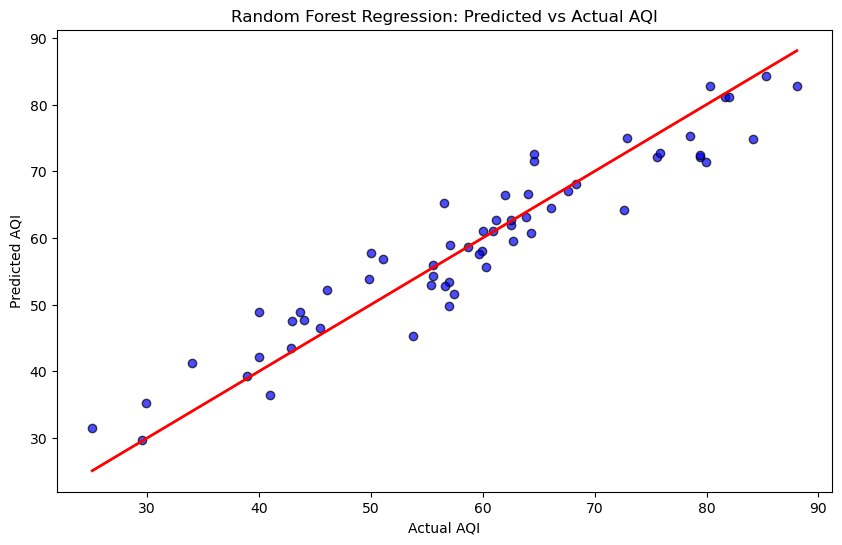

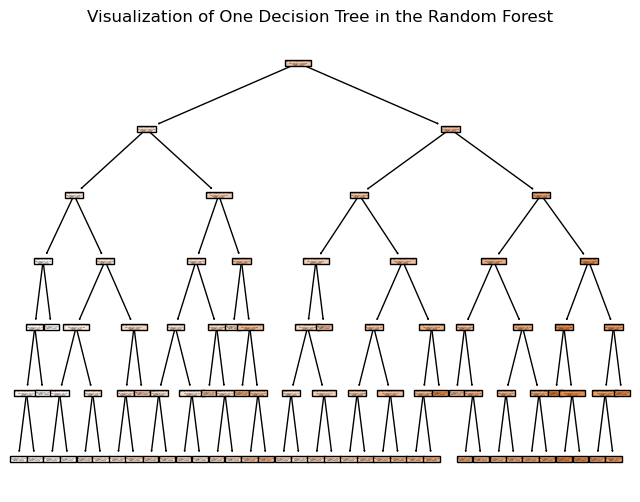

In [ ]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Generate synthetic data for AQI prediction
np.random.seed(0)  # For reproducibility
n_samples = 200

# Generate feature data
temperature = np.random.normal(20, 5, n_samples)  # Average temperature in degrees Celsius
traffic_level = np.random.randint(0, 100, n_samples)  # Traffic level on a scale from 0 to 100
pollutant_concentration = np.random.normal(50, 15, n_samples)  # Pollutant concentration in µg/m³

# Calculate AQI with a hypothetical formula
aqi = 0.5 * temperature + 0.3 * traffic_level + 0.7 * pollutant_concentration + np.random.normal(0, 5, n_samples)

# Stack the features into a feature matrix
X = np.column_stack((temperature, traffic_level, pollutant_concentration))
y = aqi  # Target variable (AQI)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest Regression: Predicted vs Actual AQI")
plt.show()


# Plot one of the decision trees from the random forest
#plt.figure(figsize=(16, 8))
plt.figure(figsize=(8, 6))
single_tree = model.estimators_[0]  # Extract the first tree in the forest
plot_tree(single_tree, feature_names=["Temperature", "Traffic Level", "Pollutant Concentration"], filled=True, proportion=True)
plt.title("Visualization of One Decision Tree in the Random Forest")
plt.show()

### 3.1.6	SUPPORT VECTOR REGRESSION (SVR)

Support Vector Machines (SVM) for regression, known as SVR (Support Vector Regression), aim to find a hyperplane that best fits the data while maintaining a margin of tolerance around it.  Instead of minimizing the error directly, SVR attempts to find a balance between the complexity of the model and the error tolerance by creating a some margin around the hyperplane where deviations are ignored. SVMs are particularly effective when the data is high-dimensional or when there is a non-linear relationship that can be transformed using kernel functions.  They are useful in applications where precision is crucial, such as time series forecasting, financial modeling, or predicting biological responses.

**Example usage:**

Predicting the future price of a stock based on historical price movements and technical indicators.

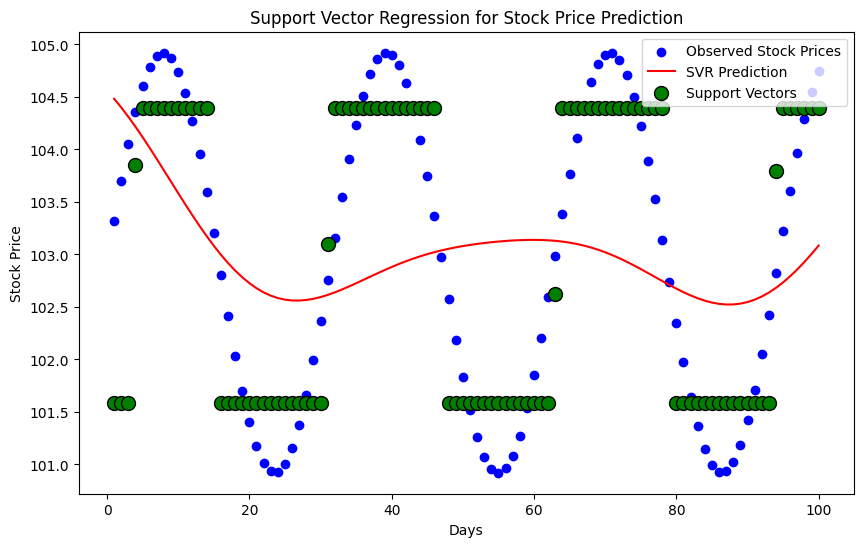

In [5]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Generate synthetic stock price data
np.random.seed(0)
days = np.arange(1, 101).reshape(-1, 1)  # 100 days, single feature (2D array)
#price_movement = 50 + 2 * np.sin(days / 5) + np.random.normal(0, 1.5, days.shape[0])  # Nonlinear trend with noise
price_movement = 50 + 2 * np.sin(days / 5) + np.random.normal(0, 30, days[0,:])

#print('days and price',np.shape(days),np.shape(price_movement))

# Standardize the data for SVR
scaler_days = StandardScaler()
scaler_price = StandardScaler()
days_scaled = scaler_days.fit_transform(days)
price_scaled = scaler_price.fit_transform(price_movement.reshape(-1, 1)).ravel()  # Flatten to 1D

# Create and train the Support Vector Regressor

#print(np.shape(days_scaled),np.shape(price_scaled))

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(days_scaled, price_scaled)

# Make predictions and transform back to original scale
price_pred_scaled = model.predict(days_scaled)
price_pred = scaler_price.inverse_transform(price_pred_scaled.reshape(-1, 1))

# Identify support vectors and transform them back to the original scale
support_vectors = scaler_days.inverse_transform(model.support_vectors_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(days, price_movement, color='blue', label="Observed Stock Prices")
plt.plot(days, price_pred, color='red', label="SVR Prediction")
plt.scatter(support_vectors, scaler_price.inverse_transform(model.dual_coef_.T), color='green', edgecolor='k', marker='o', label="Support Vectors", s=100)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Support Vector Regression for Stock Price Prediction")
plt.show()


### 3.2.1	DECISION TREES for classification

Decision trees are a versatile classification technique that works by splitting the data into subsets based on the values of input features, making a series of decisions at each node.  Each internal node represents a feature-based decision, each branch represents an outcome of that decision, and each leaf node represents a class label.  The tree is built by choosing the features that best reduce uncertainty at each step.  Decision trees are easy to interpret and visualize, making them useful for understanding how classification decisions are made.  However, they are prone to overfitting, especially if they become too deep, making them sensitive to variations in training data.

**Example usage:**

Decision trees for classification could be used for loan applicants as low-risk or high-risk based on features like credit score, annual income, and employment status.



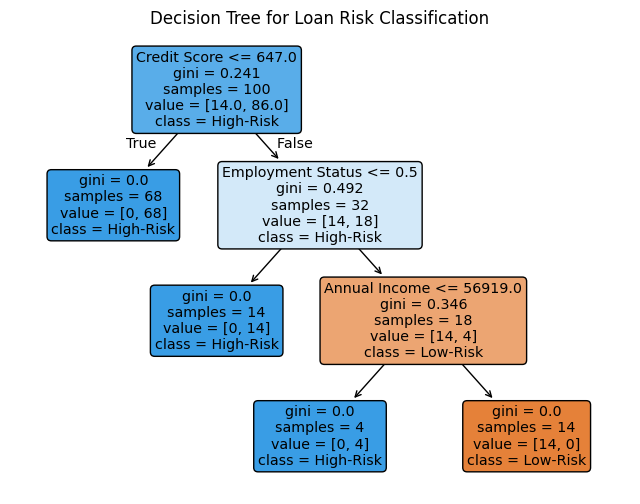

In [6]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
n_samples = 100

# Features
credit_score = np.random.randint(300, 850, n_samples)  # Credit score between 300 and 850
annual_income = np.random.randint(20_000, 150_000, n_samples)  # Income in the range $20k to $150k
employment_status = np.random.choice([0, 1], n_samples)  # 0 for unemployed, 1 for employed

# Label (0 for low-risk, 1 for high-risk)
risk_level = np.where(
    (credit_score > 650) & (annual_income > 50_000) & (employment_status == 1), 0, 1
)

# Create DataFrame
data = pd.DataFrame({
    "Credit Score": credit_score,
    "Annual Income": annual_income,
    "Employment Status": employment_status,
    "Risk Level": risk_level
})

# Separate features and labels
X = data[["Credit Score", "Annual Income", "Employment Status"]]
y = data["Risk Level"]

# Initialize and fit the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(8,6))
plot_tree(model, feature_names=X.columns, class_names=["Low-Risk", "High-Risk"], filled=True, rounded=True)
plt.title("Decision Tree for Loan Risk Classification")
plt.show()

### 3.2.2	RANDOM FORESTS for classification

Random forests are an ensemble method that uses multiple decision trees to improve the accuracy and robustness of classification.  Each tree is built on a random subset of the data and a random subset of features, and the final class prediction is determined by voting among the individual trees' predictions.  This helps to reduce the overfitting problem that individual decision trees can face and provides better generalization to new data. Random forests are particularly effective when there are complex interactions between features or when a dataset is noisy.  They are widely used in applications like medical diagnosis, image classification, and fraud detection, often offering high accuracy.

**Example usage:**

Random forests for classification could be used for detecting fraudulent transactions in a banking system based on features like transaction amount, location, and time of day.




              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00       499
  Fraudulent       1.00      1.00      1.00         1

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



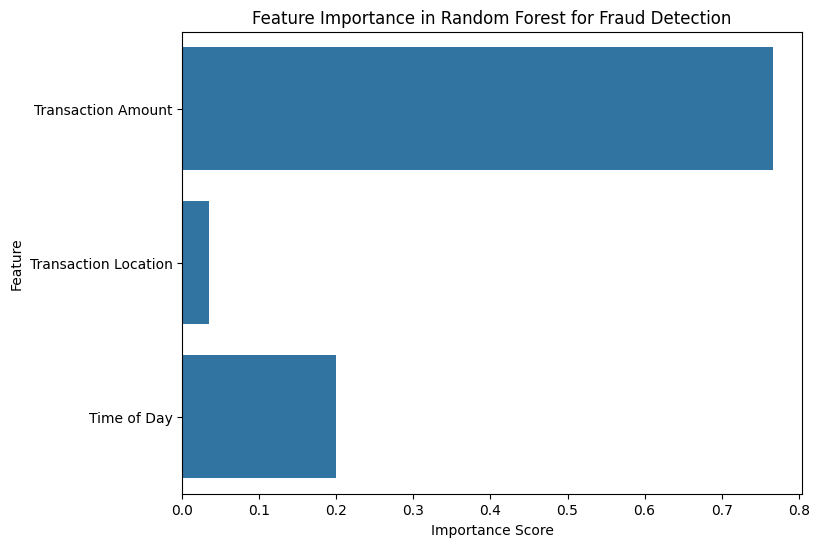

In [7]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
np.random.seed(0)
n_samples = 500

# Features
transaction_amount = np.random.normal(100, 50, n_samples).clip(5, 500)  # Transaction amount in range $5 to $500
transaction_location = np.random.choice([0, 1], n_samples)  # 0 for domestic, 1 for international
time_of_day = np.random.randint(0, 24, n_samples)  # Hour of the day (0 to 23)

# Label (0 for legitimate, 1 for fraudulent)
# Assuming high amount, international location, and unusual time are indicators of fraud
is_fraud = np.where(
    (transaction_amount > 200) & (transaction_location == 1) & (time_of_day < 6), 1, 0
)

# Create DataFrame
data = pd.DataFrame({
    "Transaction Amount": transaction_amount,
    "Transaction Location": transaction_location,
    "Time of Day": time_of_day,
    "Is Fraud": is_fraud
})

# Separate features and labels
X = data[["Transaction Amount", "Transaction Location", "Time of Day"]]
y = data["Is Fraud"]

# Initialize and fit the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X, y)

# Predict and print classification report
y_pred = model.predict(X)
print(classification_report(y, y_pred, target_names=["Legitimate", "Fraudulent"]))

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in Random Forest for Fraud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### 3.2.3	Support VECTOR CLASSIFIERS (SVC)

Support Vector Machines (SVM) are a powerful classification technique that seeks to find a hyperplane that best separates different classes in the feature space while maximizing the margin between the nearest data points of each class, known as support vectors.  SVMs are effective in high-dimensional spaces.  This flexibility makes them suitable for tasks like text classification, image recognition, and bioinformatics.  SVMs often perform well in complex classification problems, but they can be computationally intensive and may require careful tuning of parameters like the regularization parameter (C) and the kernel choice.


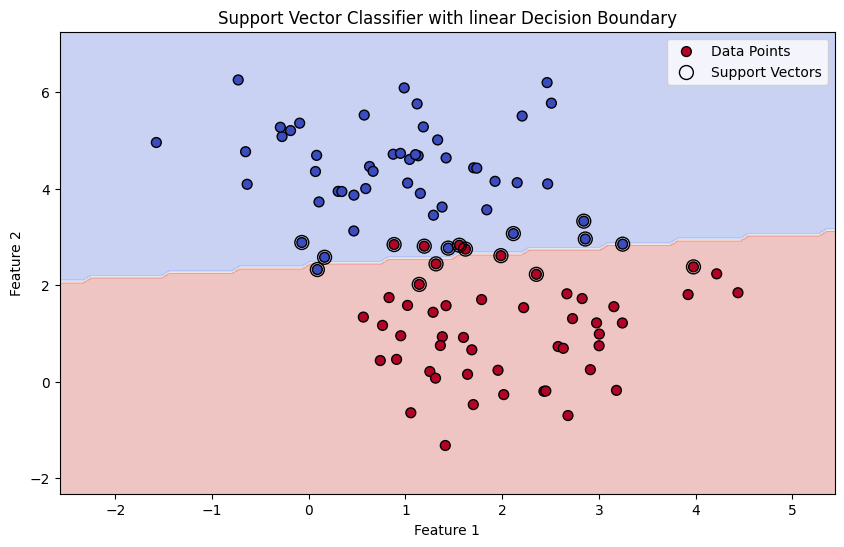

In [8]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate a synthetic 2D dataset with two classes
np.random.seed(0)
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=0)

# Create and fit the Support Vector Classifier with a non-linear kernel (e.g., 'rbf')
'''
here, we used the non-linear 'rbf' kernel. here are all the possible kernels:

kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

read more about the sklearn SVC kernels here:

https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
'''
KERNEL = 'linear' # change the kernel to see how the support vector boundary changes
model = SVC(kernel=KERNEL, C=1.0, gamma=0.5)
model.fit(X, y)

# Create a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Decision boundary area
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label="Data Points")

# Plot support vectors
support_vectors = model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title(f"Support Vector Classifier with {KERNEL} Decision Boundary")
plt.show()

### 3.2.4	K-NEAREST NEIGHBORS (KNN)

K-Nearest Neighbors (KNN) is an instance-based learning method that classifies a new data point based on the majority vote of its k nearest neighbors in the feature space.  It measures the distance (typically using Euclidean distance) between the new data point and the existing points in the training set, and assigns the class that is most common among the nearest neighbors. KNN is simple to implement and can work well for datasets with a clear separation between classes.  However, it can be computationally expensive, especially for large datasets, as it requires storing all training data and computing distances for each new prediction.

**Example usage:**

Recommending movies to a user based on the preferences of their nearest neighbors (users with similar tastes).


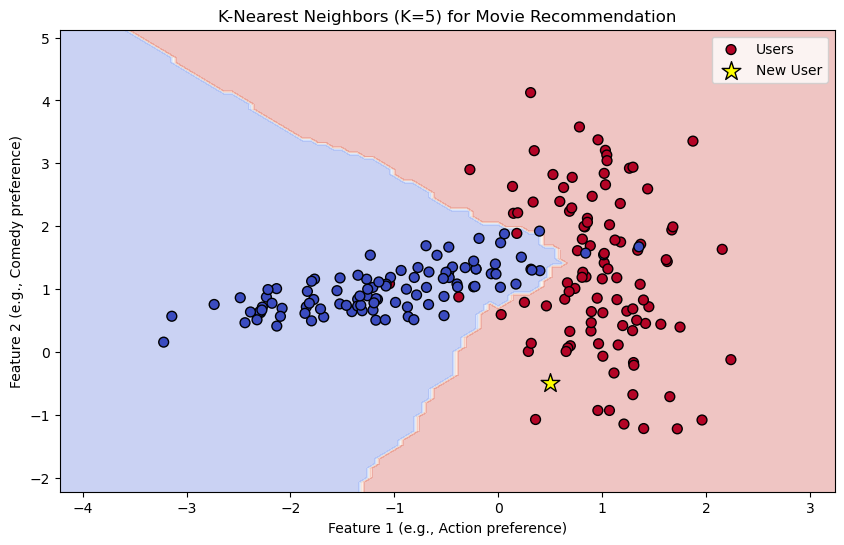

In [ ]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Generate synthetic dataset for movie preferences (2 features, 2 classes)
np.random.seed(0)
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2)

# Create and fit the KNN model
k = 5  # Number of nearest neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Decision boundary area
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label="Users")

# Example user for recommendation
example_user = np.array([[0.5, -0.5]])  # Feature values of the new user
example_prediction = model.predict(example_user)
plt.scatter(example_user[0, 0], example_user[0, 1], c='yellow', s=200, edgecolor='k', marker='*', label="New User")

plt.xlabel("Feature 1 (e.g., Action preference)")
plt.ylabel("Feature 2 (e.g., Comedy preference)")
plt.legend()
plt.title(f"K-Nearest Neighbors (K={k}) for Movie Recommendation")
plt.show()
